In [1]:
import pandas as pd
from datetime import timedelta #Simplify date manipulation

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fraud_df = pd.read_csv('inputs/dataset_mapped.csv')

# Costumer
## Fraud by Gender

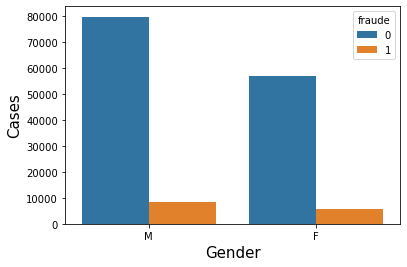

In [3]:
sns.countplot(x = 'genero', hue = 'fraude', data = fraud_df)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Cases', fontsize = 15)
plt.show()

## Fraud by Purchase Price

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


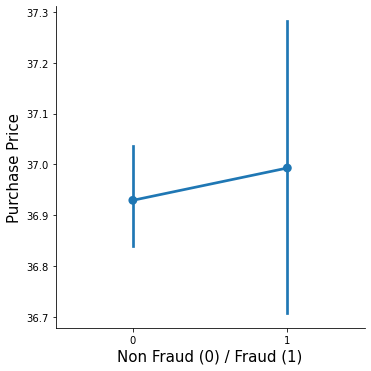

In [4]:
sns.factorplot(x = 'fraude', y = 'valor', data = fraud_df)
plt.xlabel('Non Fraud (0) / Fraud (1)', fontsize = 15)
plt.ylabel('Purchase Price', fontsize = 15)
plt.show()

In [5]:
print('From this analysis, we can see that the difference in the average purchase value in fraud and non-fraud is very small. However, the margin of error for a fraud is much greater to detect a real trend')

From this analysis, we can see that the difference in the average purchase value in fraud and non-fraud is very small. However, the margin of error for a fraud is much greater to detect a real trend


## Fraud by Age

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


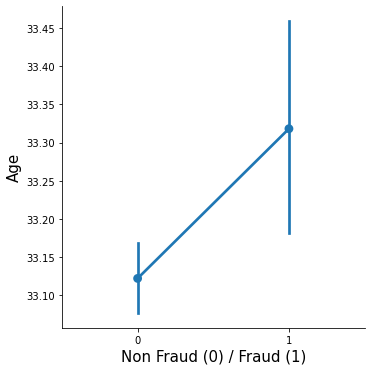

In [6]:
sns.factorplot(x = 'fraude', y = 'idade', data = fraud_df)
plt.xlabel('Non Fraud (0) / Fraud (1)', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.show()

In [7]:
print('The average age is higher for fraud, but the difference is within the margins of error')

The average age is higher for fraud, but the difference is within the margins of error


## Fraud by Marketing Source

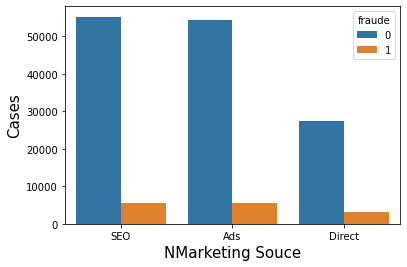

In [8]:
sns.countplot(x = 'fonte', hue= 'fraude', data = fraud_df)
plt.xlabel('NMarketing Souce', fontsize = 15)
plt.ylabel('Cases', fontsize = 15)
plt.show()

In [9]:
print('It is not evident that there is a marketing source more associated with fraud.')

It is not evident that there is a marketing source more associated with fraud.


# Countries

In [10]:
sums_fraud = fraud_df[fraud_df.fraude == 1]['fraude'].groupby(fraud_df.country).sum()
sums_fraud = sums_fraud.to_frame().reset_index()

In [11]:
sums_non_fraud = fraud_df[fraud_df.fraude == 0]['fraude'].groupby(fraud_df.country).sum()
sums_non_fraud = sums_non_fraud.to_frame().reset_index()

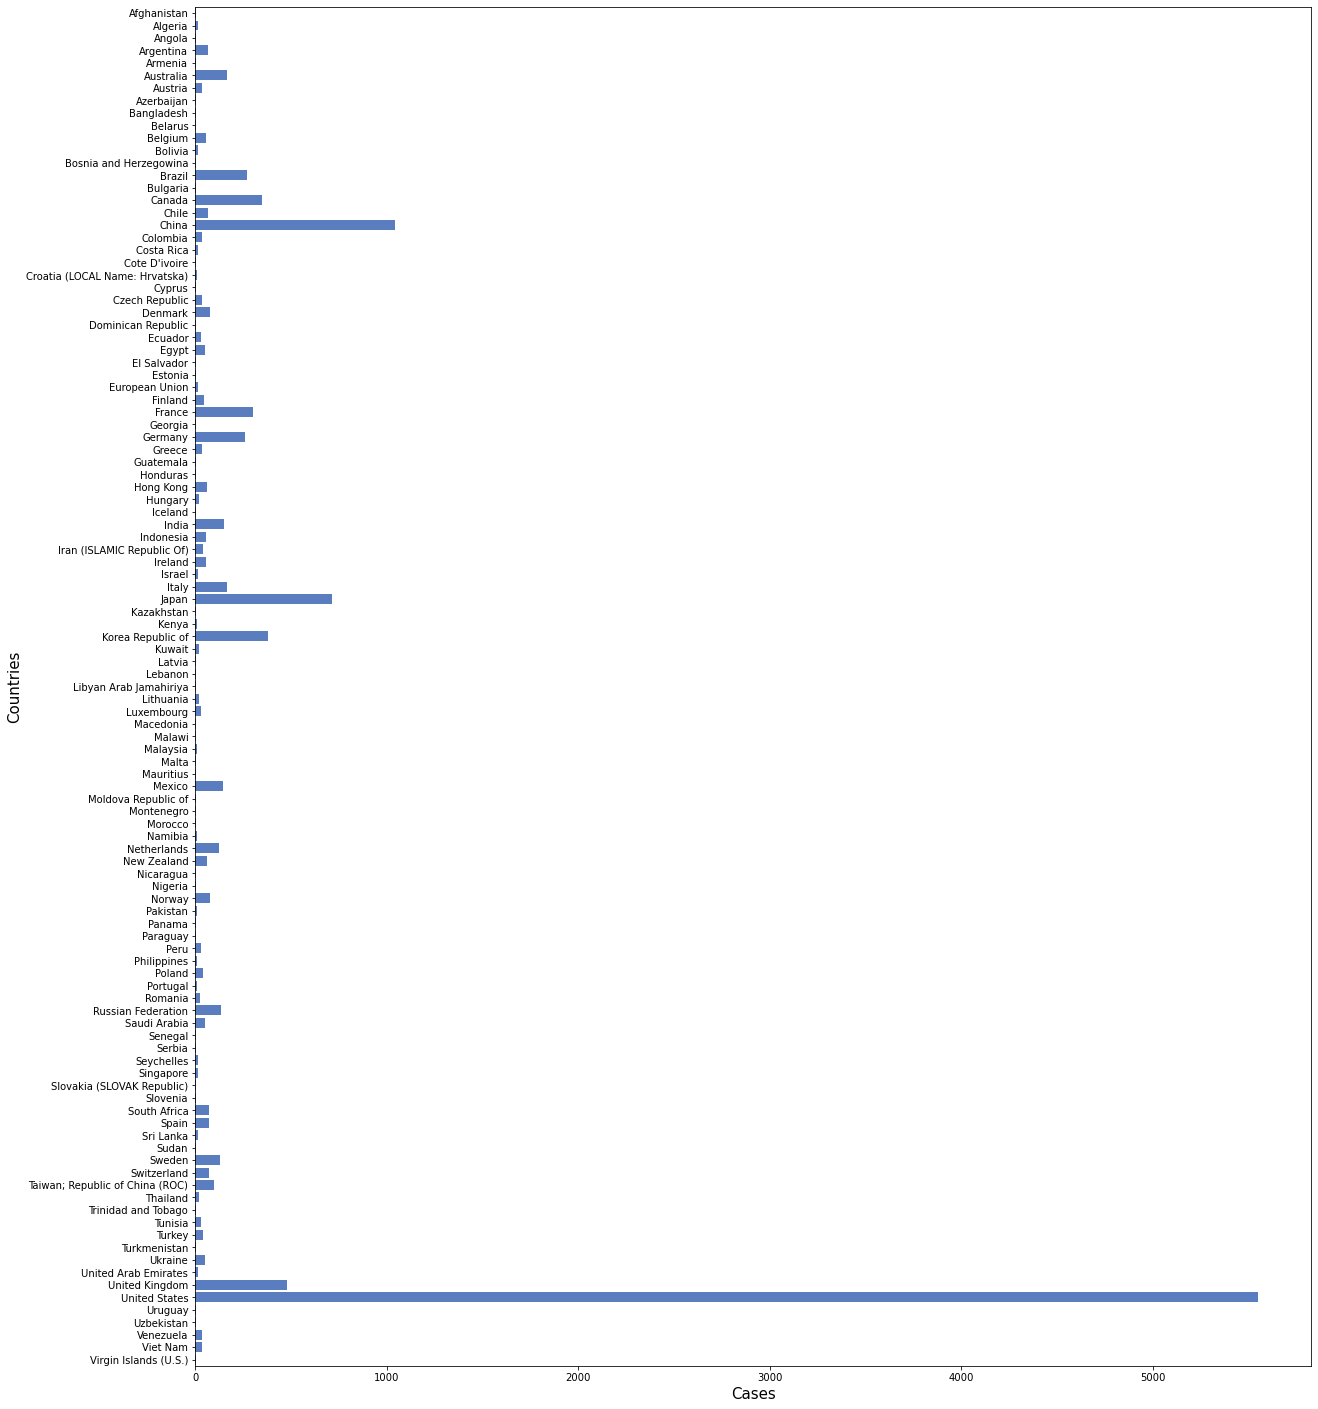

In [12]:
f, ax = plt.subplots(figsize = (20,25))
sns.set_color_codes('muted')
sns.barplot(x = 'fraude', y = 'country', data= sums_fraud,
           label = 'Total', color = 'b')
plt.xlabel('Cases', fontsize = 15)
plt.ylabel('Countries', fontsize = 15)
plt.show()

# Fraud by IDs and IPs

In [13]:
tmp_df = pd.DataFrame(columns = ('fraud', 'id by device', 'id by ip'))
tmp_df['fraud'] = fraud_df['fraude']

In [14]:
id_device_count = fraud_df.groupby('id_dispositivo').id.count()
tmp_df['id by device'] = fraud_df.id_dispositivo.apply(lambda x: id_device_count[x])

In [15]:
id_ip_count = fraud_df.groupby('ip').id.count()
tmp_df['id by ip'] = fraud_df.ip.apply(lambda x: id_ip_count[x])

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


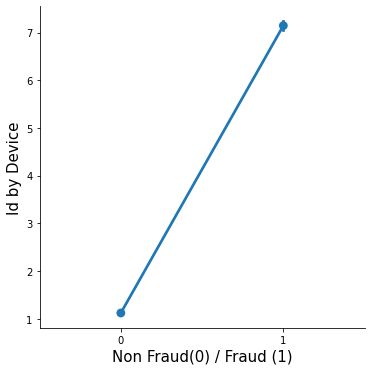

In [16]:
sns.factorplot(x = 'fraud', y = 'id by device', data = tmp_df)
plt.xlabel('Non Fraud(0) / Fraud (1)', fontsize = 15)
plt.ylabel('Id by Device', fontsize = 15)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


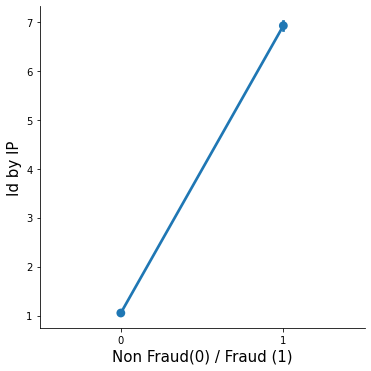

In [17]:
sns.factorplot(x = 'fraud', y = 'id by ip', data = tmp_df)
plt.xlabel('Non Fraud(0) / Fraud (1)', fontsize = 15)
plt.ylabel('Id by IP', fontsize = 15)
plt.show()

In [18]:
print('Multiple users associated with a device or an id associated with multiple IPs is indicative of fraudulent activity')

Multiple users associated with a device or an id associated with multiple IPs is indicative of fraudulent activity


# Fraud by Purchase Period
## Time elapsed between registration and purchase

In [19]:
tmp_df['register'] = fraud_df.cadastro.apply(pd.to_datetime)
tmp_df['purchase'] = fraud_df.compra.apply(pd.to_datetime)

tmp_df['timelapse'] = (tmp_df.purchase - tmp_df.register).apply(lambda x: x.seconds)

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-9.075000000000003, 0.5, 'Timelapsed in sec')

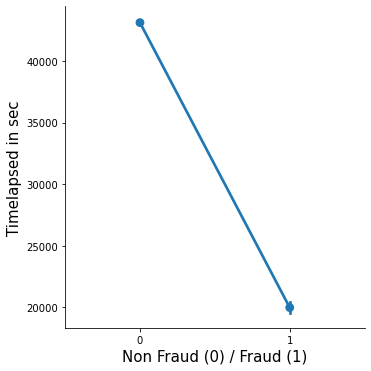

In [20]:
sns.factorplot(x = 'fraud', y = 'timelapse', data = tmp_df)
plt.xlabel('Non Fraud (0) / Fraud (1)', fontsize = 15)
plt.ylabel('Timelapsed in sec', fontsize = 15)

In [21]:
print('Very short periods of time between registration and purchase are indicative of fraud.')

Very short periods of time between registration and purchase are indicative of fraud.


## Time of Day

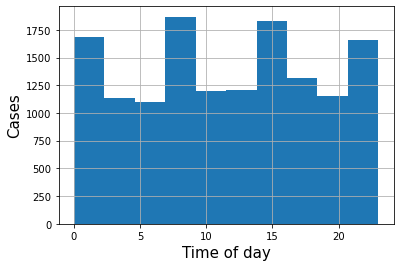

In [22]:
tmp_df[tmp_df['fraud'] == 1].register.apply(lambda x: x.hour).hist()
plt.xlabel('Time of day', fontsize = 15)
plt.ylabel('Cases', fontsize = 15)
plt.show()

## Days of the Week

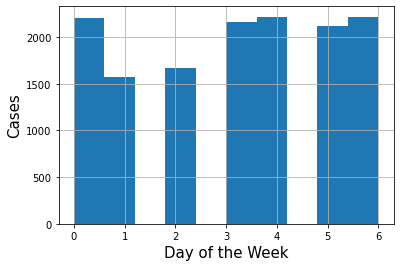

In [23]:
tmp_df[tmp_df['fraud'] == 1].register.apply(lambda x: x.dayofweek).hist()
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('Cases', fontsize = 15)
plt.show()

## Commemorative  Dates

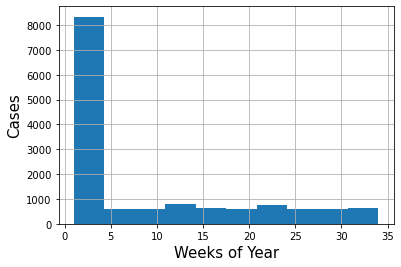

In [24]:
tmp_df[tmp_df['fraud'] == 1].register.apply(lambda x: x.week).hist()
plt.xlabel('Weeks of Year', fontsize = 15)
plt.ylabel('Cases', fontsize = 15)
plt.show()

In [25]:
print('In the first three weeks of the year, there is a high trend of fraud.')

In the first three weeks of the year, there is a high trend of fraud.
